# Map Objects to their Units

Some units are already defined in `tools/units.py`.

In [1]:
from tools.units import Gt, Mt, kt, ppm, ppb

for unit in [Gt, Mt, kt, ppm, ppb]:
    print(unit, repr(unit), end="\n\n")
pass

Gt Unit(symbol="Gt", name="gigatonne", dimension=Dimension(kg=1, m=0, s=0, A=0, K=0, cd=0, mol=0), prefix=Prefix(base=10, exponent=9, symbol="G", name="giga"), factor=Fraction(1000, 1))

Mt Unit(symbol="Mt", name="megatonne", dimension=Dimension(kg=1, m=0, s=0, A=0, K=0, cd=0, mol=0), prefix=Prefix(base=10, exponent=6, symbol="M", name="mega"), factor=Fraction(1000, 1))

kt Unit(symbol="kt", name="kilotonne", dimension=Dimension(kg=1, m=0, s=0, A=0, K=0, cd=0, mol=0), prefix=Prefix(base=10, exponent=3, symbol="k", name="kilo"), factor=Fraction(1000, 1))

ppm Unit(symbol="ppm", name="parts per million", dimension=Dimension(kg=0, m=0, s=0, A=0, K=0, cd=0, mol=0), prefix=Prefix(base=10, exponent=0, symbol="", name=""), factor=Fraction(1, 1000000))

ppb Unit(symbol="ppb", name="parts per billion", dimension=Dimension(kg=0, m=0, s=0, A=0, K=0, cd=0, mol=0), prefix=Prefix(base=10, exponent=0, symbol="", name=""), factor=Fraction(1, 1000000000))



## Additional Units

If you need addtional units then you can add them to `units.py`.

In [2]:
from fractions import Fraction
from unitsofmeasure import decprefix, Unit
from unitsofmeasure.derived import J

_FRACTION_3K6 = Fraction(3600, 1)

# energy (with dimension from SI unit)
GWh = Unit("GWh", "gigawatt-hour", J.dimension, decprefix.G, _FRACTION_3K6)
MWh = Unit("MWh", "megawatt-hour", J.dimension, decprefix.M, _FRACTION_3K6)
kWh = Unit("kWh", "kilowatt-hour", J.dimension, decprefix.k, _FRACTION_3K6)
for unit in [GWh, MWh, kWh]:
    print(unit, repr(unit), end="\n\n")
pass

GWh Unit(symbol="GWh", name="gigawatt-hour", dimension=Dimension(kg=1, m=2, s=-2, A=0, K=0, cd=0, mol=0), prefix=Prefix(base=10, exponent=9, symbol="G", name="giga"), factor=Fraction(3600, 1))

MWh Unit(symbol="MWh", name="megawatt-hour", dimension=Dimension(kg=1, m=2, s=-2, A=0, K=0, cd=0, mol=0), prefix=Prefix(base=10, exponent=6, symbol="M", name="mega"), factor=Fraction(3600, 1))

kWh Unit(symbol="kWh", name="kilowatt-hour", dimension=Dimension(kg=1, m=2, s=-2, A=0, K=0, cd=0, mol=0), prefix=Prefix(base=10, exponent=3, symbol="k", name="kilo"), factor=Fraction(3600, 1))



## Map Functions to their Units

You can decorate functions with `@map_to_unit(unit)` to map them to their units. This maps the function definition (and not return value of the function) to the unit.

In [3]:
from tools.units import map_to_unit, get_unit_of

@map_to_unit(Mt)
def get_mass():
    return 1.0

value = get_mass()
unit = get_unit_of(get_mass)
print("mass:", value, unit)
pass

mass: 1.0 Mt


## Do not map immutable Values to Units

Variables bound to constant types like `int` and `float` should not be mapped to units, because this would map the variable value (and not the variable) to the unit. Currently, this raises a TypeError, because it cannot be weakly referenced either.

In [4]:
from tools.units import unit_map

v1 = 1
v2 = 2
v3 = 1
v4 = 2

assert id(v1) == id(v3) # different variables can be bound to the same value

try:
    unit_map.map_to_unit(v1, "u1")
    unit_map.map_to_unit(v2, "u2")
    unit_map.map_to_unit(v3, "u3")
    unit_map.map_to_unit(v4, "u4")
except TypeError as e:
    print(e)

cannot create weak reference to 'int' object


## Map DataFrames or Series to Units

You can map user-defined objects like `DataFrame` or `Series` to units.

In [5]:
from solution import factory

bikeinfra_pds2 = factory.load_scenario("bikeinfrastructure", "PDS2") # Units: Megatons of CO2-eq emissions
bi_co2e = bikeinfra_pds2.c2.co2eq_mmt_reduced() # DataFrame
unit_map.map_to_unit(bi_co2e, Mt)
print("Bike Infrastructure: CO2eq reduced per year in", get_unit_of(bi_co2e))
bi_co2e

Bike Infrastructure: CO2eq reduced per year in Mt


,World,OECD90,Eastern Europe,Asia (Sans Japan),Middle East and Africa,Latin America,China,India,EU,USA
Year,,,,,,,,,,
2014,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,53.721251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,61.193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,68.509277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Label Chart Axes

with units of series.

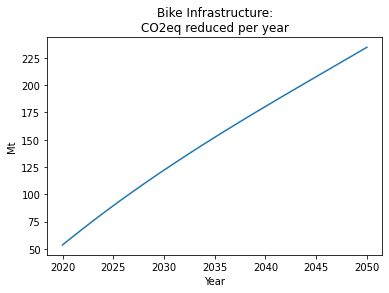

In [6]:
bi_co2e_world = bi_co2e["World"] # Series
unit_map.map_to_unit(bi_co2e_world, Mt)
bi_co2e_world.loc[2020:2050].plot(title="Bike Infrastructure:\nCO2eq reduced per year", ylabel=get_unit_of(bi_co2e_world))
pass

## Decorated Functions

Some functions are already mapped to units, but the IDs of class and object methods are different.

In [7]:
from model.co2calcs import CO2Calcs
print(id(CO2Calcs.co2eq_mmt_reduced))
print(id(bikeinfra_pds2.c2.co2eq_mmt_reduced))
unit = get_unit_of(CO2Calcs.co2eq_mmt_reduced)
try:
    unit = get_unit_of(bikeinfra_pds2.c2.co2eq_mmt_reduced)
except KeyError as e:
    print(e.__class__.__name__, e)
unit

140564337356608
140564173795136
KeyError 140564173795136


Unit(symbol="Mt", name="megatonne", dimension=Dimension(kg=1, m=0, s=0, A=0, K=0, cd=0, mol=0), prefix=Prefix(base=10, exponent=6, symbol="M", name="mega"), factor=Fraction(1000, 1))